<a href="https://colab.research.google.com/github/bootstrap666/ProcessamentoDigitalDeSinaisCovid-19/blob/main/Sistemas_LTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving HIST_PAINEL_COVIDBR_10jun2021.csv to HIST_PAINEL_COVIDBR_10jun2021 (1).csv


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

import io

Dataset = pd.read_csv(io.BytesIO(uploaded['HIST_PAINEL_COVIDBR_10jun2021.csv']),sep=';')
Dataset.head()



,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125,2,1,0,0,NaN,NaN,NaN


In [7]:
len(Dataset)

1387

In [8]:
Brasil = Dataset.query('regiao=="Brasil"')

Brasil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125,2,1,0,0,NaN,NaN,NaN


In [9]:
Brasil.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,474.0,0.0,0.0,474.000000,474.0,4.740000e+02,474.000000,474.000000,474.000000,4.190000e+02,4.190000e+02,0.0
mean,76.0,NaN,NaN,24.656118,210147125.0,6.058472e+06,36310.061181,165991.390295,1016.917722,5.947861e+06,6.928570e+05,NaN
std,0.0,NaN,NaN,14.499759,0.0,5.146740e+06,25267.715154,133409.643848,847.464877,4.561293e+06,3.225011e+05,NaN
min,76.0,NaN,NaN,1.000000,210147125.0,0.000000e+00,0.000000,0.000000,0.000000,2.213000e+04,1.406200e+04,NaN
25%,76.0,NaN,NaN,13.000000,210147125.0,1.116329e+06,16340.250000,51614.500000,457.250000,1.874703e+06,4.692445e+05,NaN
50%,76.0,NaN,NaN,21.500000,210147125.0,5.243036e+06,32976.500000,154040.500000,849.500000,5.291511e+06,6.977740e+05,NaN
75%,76.0,NaN,NaN,37.000000,210147125.0,9.752568e+06,53935.250000,237167.000000,1270.500000,9.302357e+06,9.306515e+05,NaN
max,76.0,NaN,NaN,53.000000,210147125.0,1.721097e+07,100158.000000,482019.000000,4249.000000,1.567075e+07,1.317658e+06,NaN


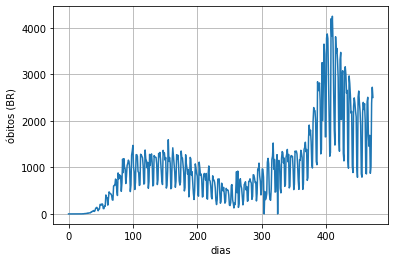

In [10]:
obitosBR = Brasil['obitosNovos']
fig = plt.figure()

plt.plot(obitosBR)
plt.xlabel('dias')
plt.ylabel('óbitos (BR)')
plt.grid('both')

plt.show()

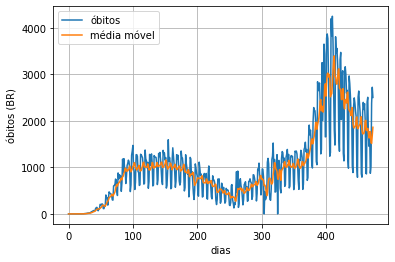

In [11]:
obitosBR_filt = signal.lfilter(1.0/6.0*np.ones(6), 1, obitosBR)
fig = plt.figure()

plt.plot(obitosBR,label='óbitos')
plt.plot(obitosBR_filt,label='média móvel')
plt.xlabel('dias')
plt.ylabel('óbitos (BR)')
plt.grid('both')
plt.legend()

plt.show()


In [12]:
SM = Dataset.query('municipio=="Santa Maria"')
SM.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
946,Sul,RS,Santa Maria,43,431690.0,43001.0,REGIAO 01,27/03/2020,13,282123,0,0,0,0,NaN,NaN,NaN
947,Sul,RS,Santa Maria,43,431690.0,43001.0,REGIAO 01,28/03/2020,13,282123,2,2,0,0,NaN,NaN,NaN
948,Sul,RS,Santa Maria,43,431690.0,43001.0,REGIAO 01,29/03/2020,14,282123,2,0,0,0,NaN,NaN,NaN
949,Sul,RS,Santa Maria,43,431690.0,43001.0,REGIAO 01,30/03/2020,14,282123,2,0,0,0,NaN,NaN,NaN
950,Sul,RS,Santa Maria,43,431690.0,43001.0,REGIAO 01,31/03/2020,14,282123,2,0,0,0,NaN,NaN,NaN


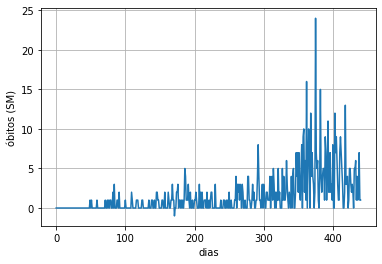

In [15]:
obitosSM = SM['obitosNovos']
fig = plt.figure()
plt.plot(range(len(obitosSM)),obitosSM)
plt.xlabel('dias')
plt.ylabel('óbitos (SM)')
plt.grid('both')


plt.show()

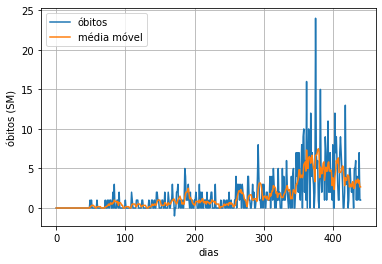

In [16]:
obitosSM_filt = signal.lfilter(1.0/6.0*np.ones(6), 1, obitosSM)
fig = plt.figure()

plt.plot(range(len(obitosSM)),obitosSM,label='óbitos')
plt.plot(range(len(obitosSM)),obitosSM_filt,label='média móvel')
plt.xlabel('dias')
plt.ylabel('óbitos (SM)')
plt.grid('both')
plt.legend()

plt.show()

In [17]:
RS = Dataset.query('estado=="RS"')
RStotal = RS.groupby("data", as_index=False,sort=False).sum()
RStotal.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,472.000000,472.000000,472.00000,472.000000,4.720000e+02,4.720000e+02,472.000000,472.000000,472.000000,472.0,472.0,472.0
mean,83.175847,403337.478814,40176.78178,48.569915,1.164083e+07,3.546386e+05,2476.351695,8141.112288,63.665254,0.0,0.0,0.0
std,10.663190,107050.987347,10663.43790,29.672369,6.996119e+04,3.639514e+05,2580.564760,8833.637486,78.815368,0.0,0.0,0.0
min,43.000000,0.000000,0.00000,2.000000,1.137724e+07,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,86.000000,431690.000000,43001.00000,26.000000,1.165936e+07,2.010425e+04,340.000000,465.000000,8.000000,0.0,0.0,0.0
50%,86.000000,431690.000000,43001.00000,43.000000,1.165936e+07,2.281375e+05,1777.000000,5429.000000,42.500000,0.0,0.0,0.0
75%,86.000000,431690.000000,43001.00000,74.000000,1.165936e+07,5.970010e+05,3855.750000,11538.250000,75.250000,0.0,0.0,0.0
max,86.000000,431690.000000,43001.00000,106.000000,1.165936e+07,1.168838e+06,12567.000000,30050.000000,506.000000,0.0,0.0,0.0


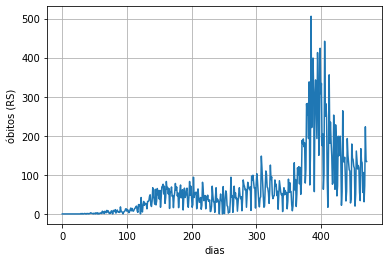

In [18]:
obitosRS = RStotal['obitosNovos']
fig = plt.figure()

plt.plot(obitosRS)
plt.xlabel('dias')
plt.ylabel('óbitos (RS)')
plt.grid('both')


plt.show()

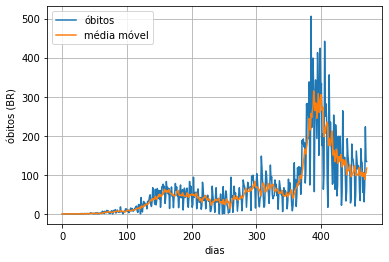

In [19]:
obitosRS_filt = signal.lfilter(1.0/6.0*np.ones(6), 1, obitosRS)
fig = plt.figure()

plt.plot(obitosRS, label='óbitos')
plt.plot(obitosRS_filt, label='média móvel')
plt.xlabel('dias')
plt.ylabel('óbitos (BR)')
plt.grid('both')
plt.legend()

plt.show()
